In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
ALL_DATA=pd.read_csv('DATOS.csv')

In [3]:
ALL_DATA.columns

Index(['Unnamed: 0', 'SUCURSAL', 'FECHA_VENTA', 'FECHA_REGISTRO', 'PROVEEDOR',
       'FOLIO_VENTA', 'TIPO_VENTA', 'CANTIDAD_VENTA', 'TOTAL_VENTA',
       'CODIGO_BARRAS', 'DTO_CLIENTE', 'TITULO', 'TIPO_PRODUCTO', 'PVP',
       'AUTOR', 'TEMA', 'SUBTEMA', 'DTO_COMERCIAL', 'COSTO_COMERCIAL',
       'PRECIO_FINAL'],
      dtype='object')

In [4]:
ALL_DATA.head(3)

,Unnamed: 0,SUCURSAL,FECHA_VENTA,FECHA_REGISTRO,PROVEEDOR,FOLIO_VENTA,TIPO_VENTA,CANTIDAD_VENTA,TOTAL_VENTA,CODIGO_BARRAS,DTO_CLIENTE,TITULO,TIPO_PRODUCTO,PVP,AUTOR,TEMA,SUBTEMA,DTO_COMERCIAL,COSTO_COMERCIAL,PRECIO_FINAL
0,4761420,SUCURSAL_2,11/04/2022 12:00:31,2006-04-10,PROVEEDOR_109,4375638.0,PISO DE VENTA,3.0,41.533333,6097898684,0.2,TITULO_640,LIBRO,17.305556,"FIERRO GOSSMAN, JULIETA",NIÃOS,CIENCIA PARA NIÃOS,0.45,9.518056,13.844444
1,1010868,SUCURSAL_13,12/07/2019 12:47:42,2017-01-30,PROVEEDOR_2,80046.0,PISO DE VENTA,1.0,16.644444,4297867073,0.0,TITULO_1389,LIBRO,16.644444,"SINCERO, JEN",SUPERACION PERSONAL Y AUTOAYUDA,AUTOAYUDA,0.47,8.821556,16.644444
2,5043563,SUCURSAL_2,07/03/2019 14:30:22,2018-03-02,PROVEEDOR_1,3990480.0,PISO DE VENTA,1.0,19.405556,7597867316,0.0,TITULO_5506,LIBRO,19.405556,"RIORDAN, RICK",LITERATURA,LITERATURA JUVENIL,0.47,10.284944,19.405556


In [5]:
ALL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83327 entries, 0 to 83326
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       83327 non-null  int64  
 1   SUCURSAL         83327 non-null  object 
 2   FECHA_VENTA      83327 non-null  object 
 3   FECHA_REGISTRO   83327 non-null  object 
 4   PROVEEDOR        83327 non-null  object 
 5   FOLIO_VENTA      83327 non-null  float64
 6   TIPO_VENTA       83327 non-null  object 
 7   CANTIDAD_VENTA   83327 non-null  float64
 8   TOTAL_VENTA      83327 non-null  float64
 9   CODIGO_BARRAS    83327 non-null  int64  
 10  DTO_CLIENTE      83327 non-null  float64
 11  TITULO           83327 non-null  object 
 12  TIPO_PRODUCTO    83327 non-null  object 
 13  PVP              83327 non-null  float64
 14  AUTOR            83327 non-null  object 
 15  TEMA             83327 non-null  object 
 16  SUBTEMA          83327 non-null  object 
 17  DTO_COMERCIA

## De las columnas que se muestran, es posible generar otras, como pueden ser "margen","utilidad","novedad","fondo","inversion","titulos por folio", etc..


In [6]:
ALL_DATA['FECHA_VENTA']

0        11/04/2022 12:00:31
1        12/07/2019 12:47:42
2        07/03/2019 14:30:22
3        08/12/2021 10:35:02
4        22/11/2020 14:46:55
                ...         
83322    04/12/2021 14:44:12
83323    10/09/2020 09:56:06
83324    10/08/2019 13:49:31
83325    20/12/2019 14:28:36
83326    01/11/2022 16:19:43
Name: FECHA_VENTA, Length: 83327, dtype: object

In [7]:
ALL_DATA['FECHA_REGISTRO']

0        2006-04-10
1        2017-01-30
2        2018-03-02
3        2021-11-19
4        2014-12-11
            ...    
83322    2021-03-03
83323    2019-10-28
83324    2009-11-03
83325    2019-02-18
83326    2017-09-27
Name: FECHA_REGISTRO, Length: 83327, dtype: object

## Como primer paso, se genera la segmentacion entre fondo y novedad
### Ya que existe diferencia en los formatos de fecha, es necesario unificarlos para poder realizar operaciones con fechas

In [8]:
F_v=ALL_DATA.FECHA_VENTA
F_ve=F_v.str.split(expand=True)
F_ven=F_ve[1].str.split('[:]', expand=True)
DMA_ven=F_ve[0].str.split('[/]', expand=True)
Fecha_ven=pd.to_datetime(DMA_ven[2]+'/'+DMA_ven[1]+'/'+DMA_ven[0])
ALL_DATA['Num_dia_ven']= DMA_ven[0]                                    # Dia de venta
ALL_DATA['FECHA_ven'] = Fecha_ven                                      #Fecha
ALL_DATA['N_dia_ven'] = Fecha_ven.dt.day_name(locale = 'Spanish')    #coloca el nombre del dia
ALL_DATA['N_mes_ven'] = Fecha_ven.dt.month_name(locale = 'Spanish') 
ALL_DATA['hora_ven']= F_ven[0]                                      #hora de venta
ALL_DATA['hora_ven_min']= F_ven[0]+':'+F_ven[1]                     #hora y minuto de venta
ALL_DATA['PERIODO']=DMA_ven[2]
ALL_DATA['MES']=DMA_ven[1]

Fecha_reg=pd.to_datetime(ALL_DATA['FECHA_REGISTRO'])
ALL_DATA['FECHA_REGISTRO']=pd.to_datetime(ALL_DATA['FECHA_REGISTRO'])   #se iguala el formato final de fechas

In [9]:
ALL_DATA[['FECHA_ven','FECHA_REGISTRO']]

,FECHA_ven,FECHA_REGISTRO
0,2022-04-11,2006-04-10
1,2019-07-12,2017-01-30
2,2019-03-07,2018-03-02
3,2021-12-08,2021-11-19
4,2020-11-22,2014-12-11
...,...,...
83322,2021-12-04,2021-03-03
83323,2020-09-10,2019-10-28
83324,2019-08-10,2009-11-03
83325,2019-12-20,2019-02-18


## La diferencia entre fondo y novedad esta en la diferencia de dias entre la fecha de registro (ficha de salida al mercado del producto) y la fecha de venta.

In [10]:
dias=(Fecha_ven - Fecha_reg).dt.days 
ALL_DATA['FONDO_90d'] = np.where(dias > 90, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_180d'] = np.where(dias > 180, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_540d'] = np.where(dias > 540, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_1080d'] = np.where(dias > 1080, 'FONDO', 'NOVEDAD')

## Se agragan nuevas columnas, segun el numero de días necesarios entre la fecha de venta y de registro para diferenciarse entre fondo y novedad.

In [11]:
ALL_DATA.columns

Index(['Unnamed: 0', 'SUCURSAL', 'FECHA_VENTA', 'FECHA_REGISTRO', 'PROVEEDOR',
       'FOLIO_VENTA', 'TIPO_VENTA', 'CANTIDAD_VENTA', 'TOTAL_VENTA',
       'CODIGO_BARRAS', 'DTO_CLIENTE', 'TITULO', 'TIPO_PRODUCTO', 'PVP',
       'AUTOR', 'TEMA', 'SUBTEMA', 'DTO_COMERCIAL', 'COSTO_COMERCIAL',
       'PRECIO_FINAL', 'Num_dia_ven', 'FECHA_ven', 'N_dia_ven', 'N_mes_ven',
       'hora_ven', 'hora_ven_min', 'PERIODO', 'MES', 'FONDO_90d', 'FONDO_180d',
       'FONDO_540d', 'FONDO_1080d'],
      dtype='object')

# Exploracion de datos

In [12]:
VENTA=ALL_DATA.groupby(pd.Grouper(key='FECHA_ven',freq='1d')).sum()[['TOTAL_VENTA']]
lis=VENTA.TOTAL_VENTA.tolist()
a=0
suma=[]
for i in lis:
    a=a+i
    suma.append(a)
#ala=test2.FECHA.unique()
venta=pd.DataFrame({'Venta':lis,'SUMA':suma})

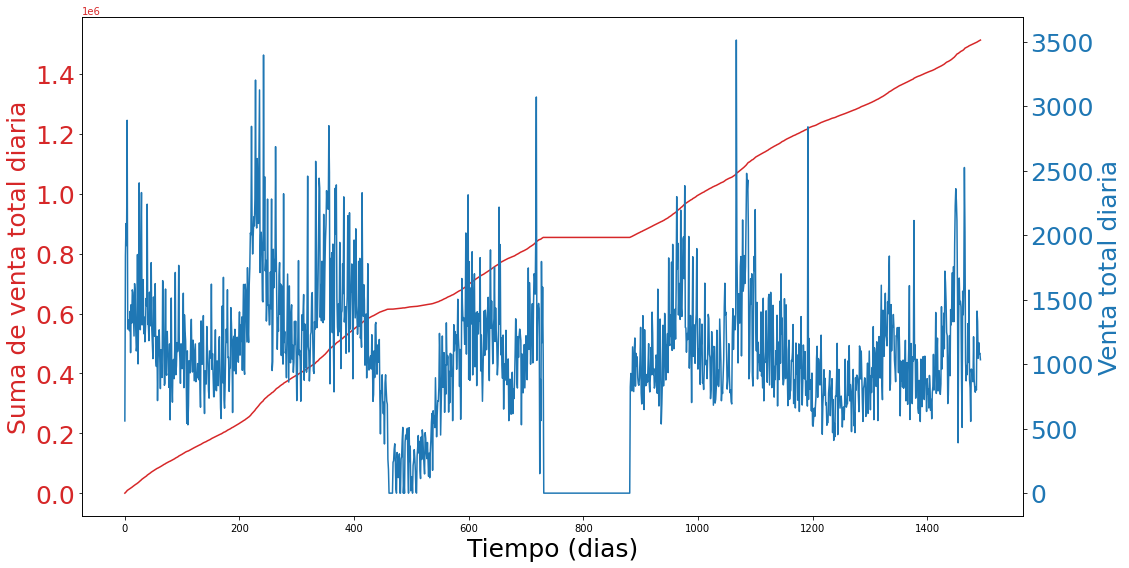

In [13]:
rcParams['figure.figsize'] = 16, 8


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tiempo (dias)', fontsize=25)
ax1.set_ylabel('Suma de venta total diaria', color=color, fontsize=25)
ax1.plot(venta.SUMA, color=color)
ax1.tick_params(axis='y', labelcolor=color,labelsize=25)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Venta total diaria', color=color, fontsize=25)  # we already handled the x-label with ax1
ax2.plot(venta.Venta, color=color)
ax2.tick_params(axis='y', labelcolor=color ,labelsize=25)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#3plt.savefig('Ventas_19_20_21_todo')
plt.show()


In [14]:
ALL_DATA.groupby(['PERIODO']).sum()[['TOTAL_VENTA','CANTIDAD_VENTA']]

,TOTAL_VENTA,CANTIDAD_VENTA
PERIODO,,
2019,492165.307866,32165.0
2020,362138.413932,22415.0
2021,259225.254559,15845.0
2022,362937.051149,21126.0
2023,36749.292491,2174.0


In [15]:
ALL_DATA.groupby(['PERIODO','FONDO_90d']).sum()[['TOTAL_VENTA','CANTIDAD_VENTA']]

TOTAL_VENTA  CANTIDAD_VENTA
PERIODO FONDO_90d                               
2019    FONDO      435087.187046         28630.0
        NOVEDAD     57078.120820          3535.0
2020    FONDO      324138.979040         20301.0
        NOVEDAD     37999.434892          2114.0
2021    FONDO      230516.028147         14186.0
        NOVEDAD     28709.226412          1659.0
2022    FONDO      319331.107343         18785.0
        NOVEDAD     43605.943806          2341.0
2023    FONDO       31922.006604          1914.0
        NOVEDAD      4827.285886           260.0